# Band alignment using potential method

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def findmax(a, rng):
    tmpi = rng[0]
    for i in range(rng[0], rng[1]):
        if a[tmpi] < a[i]:
            tmpi = i
    return tmpi
def findmin(a, rng):
    tmpi = rng[0]
    for i in range(rng[0], rng[1]):
        if a[tmpi] > a[i]:
            tmpi = i
    return tmpi

## Potential of interface

324 324
0.695919 0.765409
average in si region:   9.7415
average in si3n4 region:  10.1510


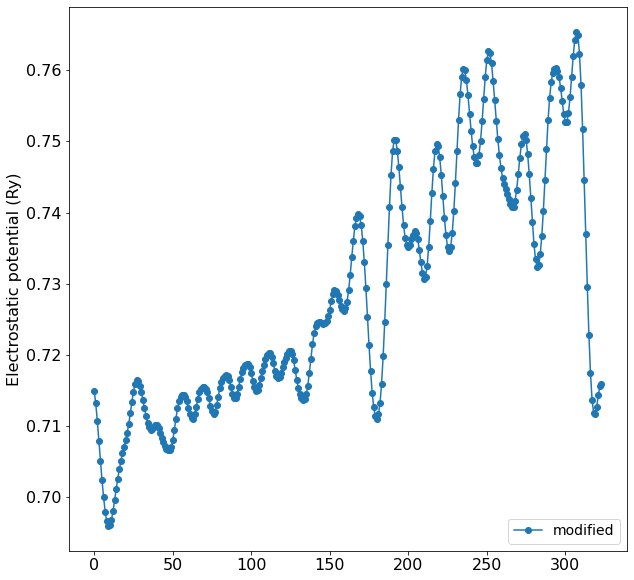

In [3]:
prefix = './interface/potential'
x = []
y = []
with open(prefix+'/interface_ave_CUBE.dat', 'r') as f:
    line = f.readline()
    while line != '':
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
        line = f.readline()
x = np.array(x)
y = np.array(y)
     
x2 = []
y2 = []
with open(prefix+'/interface_ave_diff.dat', 'r') as f:
    line = f.readline()
    while line != '':
        x2.append(float(line.split()[0]))
        y2.append(float(line.split()[1]))
        line = f.readline()
x2 = np.array(x2)
y2 = np.array(y2)
print(len(x2),len(y2))
print(min(y2),max(y2))      
localx1 = findmax(y2, [50,60])
localx2 = findmax(y2, [120,130])
int_si_vh = sum(y2[localx1:localx2])/(localx2-localx1)*13.605698065894
print("average in si region: %8.4f"%(sum(y2[localx1:localx2])/(localx2-localx1)*13.605698065894))
localx3 = findmax(y2, [200,210])
localx4 = findmax(y2, [290,300])
int_si3n4_vh = sum(y2[localx3:localx4])/(localx4-localx3)*13.605698065894
print("average in si3n4 region: %8.4f"%(sum(y2[localx3:localx4])/(localx4-localx3)*13.605698065894))

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
# plt.plot(x, y, 'o-', label='original')
# print(ax.get_ylim())
# plt.imshow(img,zorder=0,extent=[0,350,0,100])
plt.plot(range(len(x2)), y2, 'o-', label='modified')

plt.legend(loc='lower right', fontsize=14)
plt.ylabel('Electrostatic potential (Ry)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.xlim([50,300])
plt.show()

## Potential of bulk silicon

Average of y2:   8.6462 eV


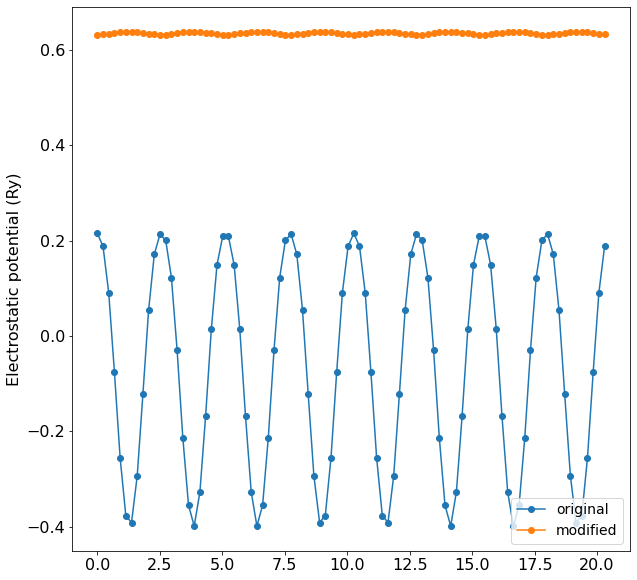

In [4]:
import matplotlib.pyplot as plt
import numpy as np
prefix = './interface/potential'
x = []
y = []
with open(prefix+'/si-bulk_ave_CUBE.dat', 'r') as f:
    line = f.readline()
    while line != '':
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
        line = f.readline()
        
        
x2 = []
y2 = []
with open(prefix+'/si-bulk_ave_diff.dat', 'r') as f:
    line = f.readline()
    while line != '':
        x2.append(float(line.split()[0]))
        y2.append(float(line.split()[1]))
        line = f.readline()
        
print("Average of y2: %8.4f eV"%(sum(y2)/len(y2)*13.605698065894))
bulk_si_vh = sum(y2)/len(y2)*13.605698065894
dft_si_homo = 6.2703
dft_si_lumo = 6.9437
dm_si_homo = 5.53
dm_si_lumo = 6.82

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.plot(x, y, 'o-', label='original')
plt.plot(x2, y2, 'o-', label='modified')
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('Electrostatic potential (Ry)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Potential of amorphous silicon nitride

Average of y2:  11.9757 eV


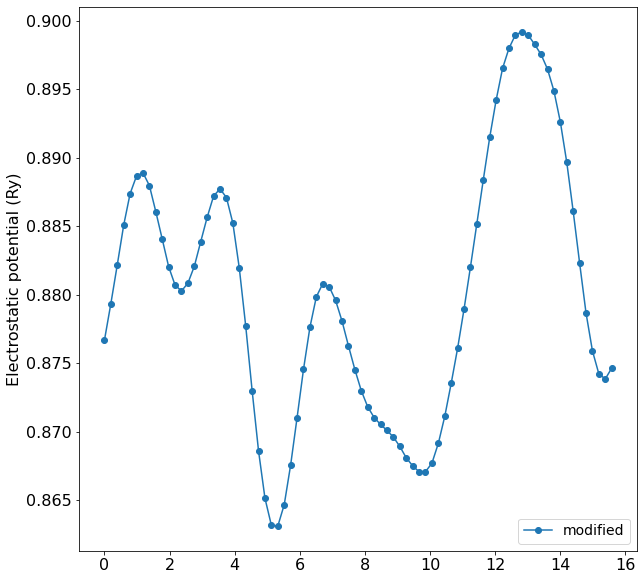

In [5]:
import matplotlib.pyplot as plt
import numpy as np
prefix = './interface/potential'
x = []
y = []
with open(prefix+'/si3n4-bulk_ave_CUBE.dat', 'r') as f:
    line = f.readline()
    while line != '':
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
        line = f.readline()
        
        
x2 = []
y2 = []
with open(prefix+'/si3n4-bulk_ave_diff.dat', 'r') as f:
    line = f.readline()
    while line != '':
        x2.append(float(line.split()[0]))
        y2.append(float(line.split()[1]))
        line = f.readline()
        
print("Average of y2: %8.4f eV"%(sum(y2)/len(y2)*13.605698065894))
bulk_si3n4_vh = sum(y2)/len(y2)*13.605698065894
dft_si3n4_homo = 8.2978
dft_si3n4_lumo = 11.4889
dm_si3n4_homo = 6.99
dm_si3n4_lumo = 11.76

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
# plt.plot(x, y, 'o-', label='original')
plt.plot(x2, y2, 'o-', label='modified')
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('Electrostatic potential (Ry)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Compute the band alignment of the interface using the potentials computed above

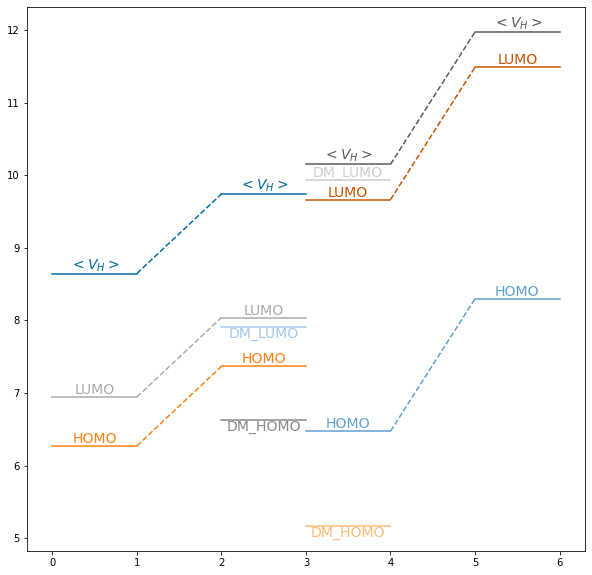

In [6]:
from palettable.tableau import ColorBlind_10 
myc = ColorBlind_10.hex_colors

fig = plt.figure(figsize=(10,10))

## Plot bulk silicon energy levels
plt.plot([0,1],[bulk_si_vh, bulk_si_vh], color=myc[0])
plt.text(0.5, bulk_si_vh, r'$<V_H>$', ha='center', va='bottom', fontsize=14, color=myc[0])
plt.plot([0,1],[dft_si_homo, dft_si_homo], color=myc[1])
plt.text(0.5, dft_si_homo, 'HOMO', ha='center', va='bottom', fontsize=14, color=myc[1])
plt.plot([0,1],[dft_si_lumo, dft_si_lumo], color=myc[2])
plt.text(0.5, dft_si_lumo, 'LUMO', ha='center', va='bottom', fontsize=14, color=myc[2])

## Plot interface V_H
plt.plot([2,3],[int_si_vh, int_si_vh], color=myc[0])
plt.text(2.5, int_si_vh, r'$<V_H>$', ha='center', va='bottom', fontsize=14, color=myc[0])
plt.plot([1,2],[bulk_si_vh, int_si_vh], '--', color=myc[0])
plt.plot([3,4],[int_si3n4_vh, int_si3n4_vh], color=myc[3])
plt.text(3.5, int_si3n4_vh, r'$<V_H>$', ha='center', va='bottom', fontsize=14, color=myc[3])

## Plot bulk Si3N4 energy levels
plt.plot([5,6], [bulk_si3n4_vh, bulk_si3n4_vh], color=myc[3])
plt.text(5.5, bulk_si3n4_vh, r'$<V_H>$', ha='center', va='bottom', fontsize=14, color=myc[3])
plt.plot([4,5], [int_si3n4_vh, bulk_si3n4_vh], '--', color=myc[3])
plt.plot([5,6], [dft_si3n4_homo, dft_si3n4_homo], color=myc[4])
plt.text(5.5, dft_si3n4_homo, 'HOMO', ha='center', va='bottom', fontsize=14, color=myc[4])
plt.plot([5,6], [dft_si3n4_lumo, dft_si3n4_lumo], color=myc[5])
plt.text(5.5, dft_si3n4_lumo, 'LUMO', ha='center', va='bottom', fontsize=14, color=myc[5])

## DFT method of silicon energy level in interface 
plt.plot([2,3], [dft_si_homo-bulk_si_vh+int_si_vh, dft_si_homo-bulk_si_vh+int_si_vh], color=myc[1])
plt.text(2.5, dft_si_homo-bulk_si_vh+int_si_vh, 'HOMO', ha='center', va='bottom', fontsize=14, color=myc[1])
plt.plot([1,2],[dft_si_homo, dft_si_homo-bulk_si_vh+int_si_vh], '--', color=myc[1])
plt.plot([2,3], [dft_si_lumo-bulk_si_vh+int_si_vh, dft_si_lumo-bulk_si_vh+int_si_vh], color=myc[2])
plt.text(2.5, dft_si_lumo-bulk_si_vh+int_si_vh, 'LUMO', ha='center', va='bottom', fontsize=14, color=myc[2])
plt.plot([1,2],[dft_si_lumo, dft_si_lumo-bulk_si_vh+int_si_vh], '--', color=myc[2])


## DFT method of Si3N4 energy level in interface 
plt.plot([3,4], [dft_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh, dft_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh], color=myc[4])
plt.text(3.5, dft_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh, 'HOMO', ha='center', va='bottom', fontsize=14, color=myc[4])
plt.plot([4,5], [dft_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh, dft_si3n4_homo], '--', color=myc[4])
plt.plot([3,4], [dft_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh, dft_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh], color=myc[5])
plt.text(3.5, dft_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh, 'LUMO', ha='center', va='bottom', fontsize=14, color=myc[5])
plt.plot([4,5], [dft_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh, dft_si3n4_lumo], '--', color=myc[5])

## Deflated method of silicon energy level
plt.plot([2,3], [dm_si_homo-bulk_si_vh+int_si_vh, dm_si_homo-bulk_si_vh+int_si_vh], color=myc[6])
plt.text(2.5, dm_si_homo-bulk_si_vh+int_si_vh, 'DM_HOMO', ha='center', va='top', fontsize=14, color=myc[6])
plt.plot([2,3], [dm_si_lumo-bulk_si_vh+int_si_vh, dm_si_lumo-bulk_si_vh+int_si_vh], color=myc[7])
plt.text(2.5, dm_si_lumo-bulk_si_vh+int_si_vh, 'DM_LUMO', ha='center', va='top', fontsize=14, color=myc[7])

## Deflated method of Si3N4 energy level
plt.plot([3,4], [dm_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh, dm_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh], color=myc[8])
plt.text(3.5, dm_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh, 'DM_HOMO', ha='center', va='top', fontsize=14, color=myc[8])
plt.plot([3,4], [dm_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh, dm_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh], color=myc[9])
plt.text(3.5, dm_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh, 'DM_LUMO', ha='center', va='bottom', fontsize=14, color=myc[9])

plt.show()

In [7]:
dft_si_homo_int = dft_si_homo-bulk_si_vh+int_si_vh
dft_si_lumo_int = dft_si_lumo-bulk_si_vh+int_si_vh
dft_si3n4_homo_int = dft_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh
dft_si3n4_lumo_int = dft_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh
dm_si_homo_int = dm_si_homo-bulk_si_vh+int_si_vh
dm_si_lumo_int = dm_si_lumo-bulk_si_vh+int_si_vh
dm_si3n4_homo_int = dm_si3n4_homo-bulk_si3n4_vh+int_si3n4_vh
dm_si3n4_lumo_int = dm_si3n4_lumo-bulk_si3n4_vh+int_si3n4_vh

print("%10s%10s%10s%10s%10s"%("","VBO","CBO","Eg(Si)", "Eg(Si3N4)"))
print("Based on average potential")
print("%10s%10.2f%10.2f%10.2f%10.2f"
      %("PBE", 
        dft_si_homo_int    - dft_si3n4_homo_int, 
        dft_si3n4_lumo_int - dft_si_lumo_int,
        dft_si_lumo_int    - dft_si_homo_int, 
        dft_si3n4_lumo_int - dft_si3n4_homo_int))
print("%10s%10.2f%10.2f%10.2f%10.2f"
      %("DM", 
        dm_si_homo_int    - dm_si3n4_homo_int, 
        dm_si3n4_lumo_int - dm_si_lumo_int,
        dm_si_lumo_int    - dm_si_homo_int, 
        dm_si3n4_lumo_int - dm_si3n4_homo_int))
print("Based on LDOS")
print("%10s%10.2f%10.2f%10.2f%10.2f"
      %("PBE", 0.83, 1.49, 0.67, 3.19))
print("%10s%10.2f%10.2f%10.2f%10.2f"
      %("DM", 1.41, 1.88, 1.29, 4.77))
print("Reference values in Anh's APL 2013")
print("%10s%10.1f%10.1f%10.1f%10.2f"
      %("PBE", 0.8, 1.5, 0.7,3.17))
print("%10s%10.1f%10.1f%10.1f%10.2f"
      %("DM", 1.5, 1.9, 1.3, 4.87))
print("  ")
print("%10s%10s%10s%10s%10s"
      %("Expt", "1.5-1.78", "1.83-2.83", "1.17", "4.5-5.5"))

                 VBO       CBO    Eg(Si) Eg(Si3N4)
Based on average potential
       PBE      0.89      1.63      0.67      3.19
        DM      1.46      2.02      1.29      4.77
Based on LDOS
       PBE      0.83      1.49      0.67      3.19
        DM      1.41      1.88      1.29      4.77
Reference values in Anh's APL 2013
       PBE       0.8       1.5       0.7      3.17
        DM       1.5       1.9       1.3      4.87
  
      Expt  1.5-1.78 1.83-2.83      1.17   4.5-5.5
